<a href="https://colab.research.google.com/github/alisonands/CryptoClustering/blob/main/CryptoClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Issues: Cannot use hvplot (need to make hover points)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
# import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
data = pd.read_csv('crypto_market_data.csv')
data.set_index('coin_id', inplace = True)     #set index to coin id
data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [9]:
# Scaled data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.set_index(data.index, inplace = True)
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [10]:
# summary
scaled_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01,4.100000e+01
mean,0.000000,1.895503e-16,2.707861e-17,2.978647e-17,-5.415722e-18,-1.326852e-16,4.197185e-17
std,1.012423,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00,1.012423e+00
min,-4.981042,-1.682027e+00,-2.217108e+00,-1.393153e+00,-9.560487e-01,-5.511464e-01,-2.963296e-01
25%,-0.127467,-7.066688e-01,-6.299628e-01,-4.605580e-01,-5.517599e-01,-4.998478e-01,-2.817468e-01
50%,0.077497,-1.906843e-01,-9.190922e-03,-6.103015e-02,-1.592496e-01,-3.550537e-01,-2.255326e-01
75%,0.331280,4.931931e-01,6.435649e-01,1.165382e-01,1.606038e-02,-4.736110e-02,-1.454693e-01
max,1.919812,2.572251e+00,2.907054e+00,5.351455e+00,4.769913e+00,4.632380e+00,6.088625e+00


<Axes: xlabel='coin_id'>

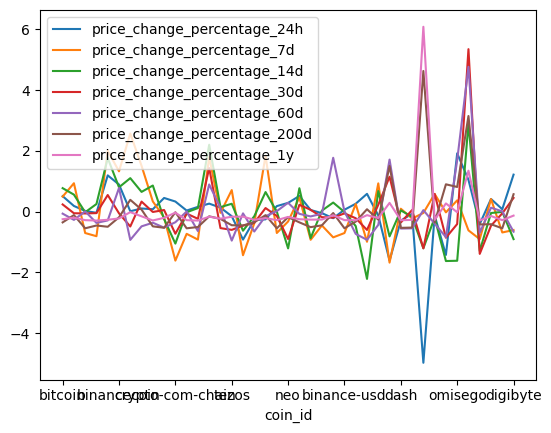

In [11]:
# Plot scaled data
scaled_data.plot()

### Find the best k value using the scaled data

In [12]:
# Finding inertia values
k_val_list = list(range(1,11))
inertia = []
for i in k_val_list:
  k_model = KMeans(n_clusters = i)
  k_model.fit(scaled_data)
  inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

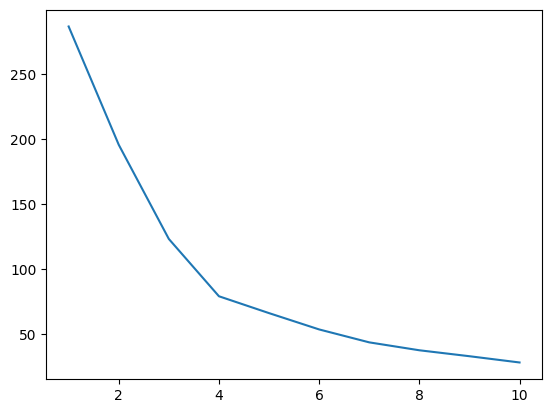

In [13]:
# Plotting inertia values
plt.plot(k_val_list, inertia)


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:**
Given this graph, the best value for k is 4.

### Cluster Cryptocurrencies with K-means Using the Original Data

In [14]:
# Training the KMeans model on 4 clusters
model = KMeans(n_clusters=4)
model.fit(scaled_data)
y_pred = model.predict(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
scaled_data['k_val'] = y_pred
scaled_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,k_val
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


Text(0.5, 1.0, 'K-Means predictions with n_clusters = 4')

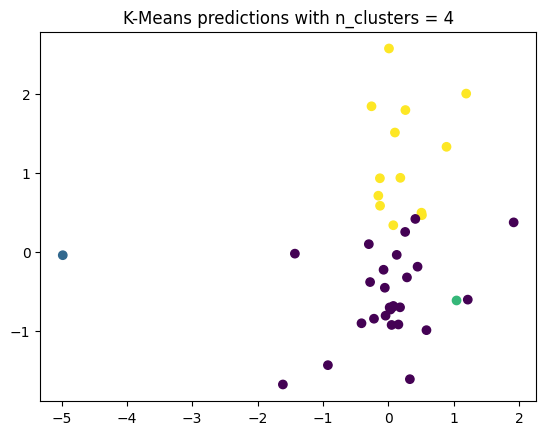

In [16]:
plt.scatter(scaled_data['price_change_percentage_24h'], scaled_data['price_change_percentage_7d'], c = scaled_data['k_val'])
plt.title('K-Means predictions with n_clusters = 4')

<Axes: title={'center': 'K-Means predictions with n_clusters = 4'}, xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

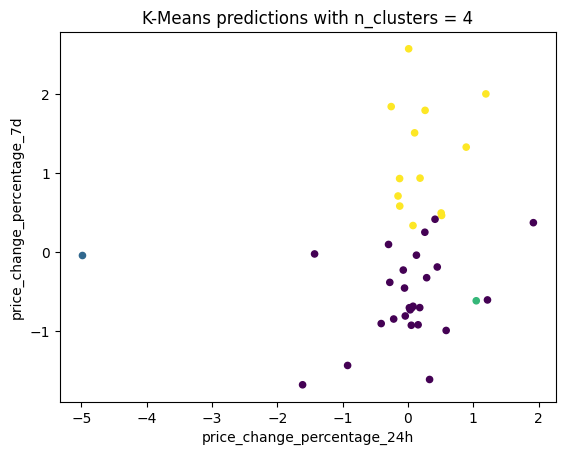

In [17]:
scaled_data.plot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    # by = 'k_val'
    c = scaled_data['k_val'].values.tolist(),
    title = 'K-Means predictions with n_clusters = 4'
)


### Optimizing clusters with PCA

In [18]:
# initializing the pca model
pca = PCA(n_components = 3)

In [19]:
# reducing the variables with pca
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=[['PC1', 'PC2', 'PC3']])
pca_df.head()

,PC1,PC2,PC3
0,2.059139,-0.536684,-0.438238
1,1.956401,-0.410821,-1.016966
2,-0.990142,-0.454228,0.690021
3,-0.973189,-0.494650,0.551234
4,3.330367,-1.022311,-0.501341


In [20]:
pca.explained_variance_ratio_
print (f'the total explained variance of the three principle components is {pca.explained_variance_ratio_.sum()}')

the total explained variance of the three principle components is 0.889153306150571


### Find the best value for k using the PCA data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

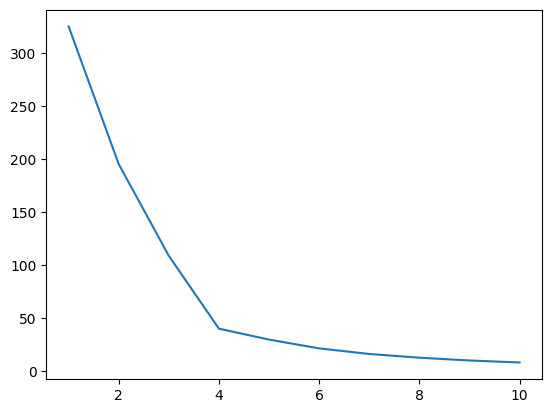

In [21]:
# Loop through the pca dataframe to find best k values
k_val_list = list(range(1, 11))
inertia = []
for i in k_val_list:
  k_model = KMeans(n_clusters=i)
  k_model.fit(pca_df)
  inertia.append(k_model.inertia_)

plt.plot(k_val_list, inertia)


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**
The best value for k using the PCA data is still 4.

* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**
No.

In [22]:
# Predicting pca dataframe to kmeans
model = KMeans(n_clusters=4)
model.fit(pca_df)
y_pred = model.predict(pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
# Predicted k values for pca dataframe
final_pca_df = pca_df.copy()
final_pca_df['k_val'] = y_pred
final_pca_df.set_index(scaled_data.index, inplace = True)
final_pca_df.head()

,PC1,PC2,PC3,k_val
coin_id,,,,
bitcoin,2.059139,-0.536684,-0.438238,1
ethereum,1.956401,-0.410821,-1.016966,1
tether,-0.990142,-0.454228,0.690021,0
ripple,-0.973189,-0.494650,0.551234,0
bitcoin-cash,3.330367,-1.022311,-0.501341,1


<Axes: xlabel='PC1', ylabel='PC2'>

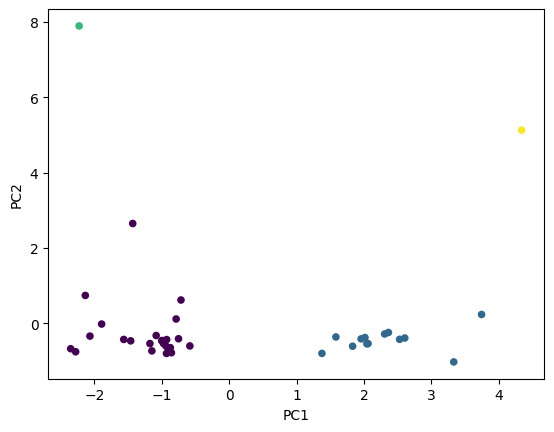

In [24]:
# Plotting pca dataframe k values with PC1 and PC2
final_pca_df.plot.scatter(
    x = 'PC1',
    y = 'PC2',
    # by = 'k_val'
    c = final_pca_df['k_val'].values.tolist()
)


<Axes: title={'center': 'KMeans predictions with PCA data.'}, xlabel='PC1', ylabel='PC2'>

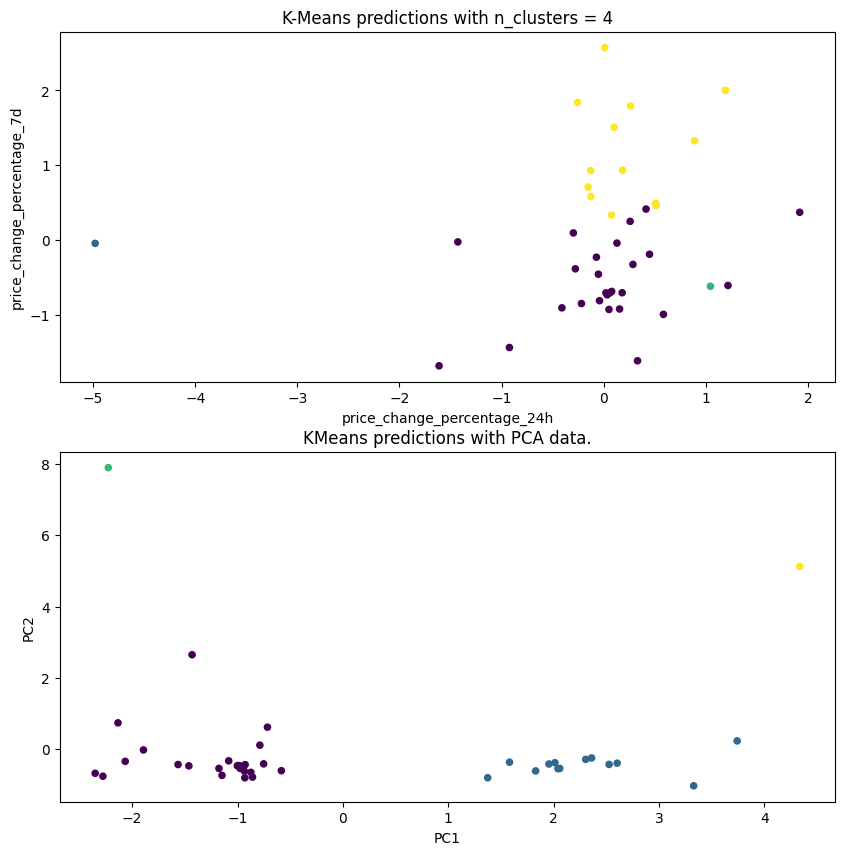

In [25]:
fig, axes = plt.subplots(nrows = 2, ncols = 1)

fig.set_figheight(10)
fig.set_figwidth(10)

scaled_data.plot.scatter(ax = axes[0],
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    # by = 'k_val'
    c = scaled_data['k_val'].values.tolist(),
    title = 'K-Means predictions with n_clusters = 4'
)

final_pca_df.plot.scatter(ax = axes[1],
    x = 'PC1',
    y = 'PC2',
    # by = 'k_val'
    c = final_pca_df['k_val'].values.tolist(),
    title = 'KMeans predictions with PCA data.'
)
# plt.title('Clusters comparison')


#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features allows it to categorize things more accurately.